In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

from sklearn.metrics import roc_curve, auc


In [ ]:
# Load the dataset
df = pd.read_csv("/content/Student Depression Dataset.csv")

# Display the first few rows of the dataset
print(df.head())

# Check for missing values in the dataset
print(df.isnull().sum())


   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Standardize column names (strip spaces)
df.columns = df.columns.str.strip()

# Print column names to verify
print("Columns in dataset:", df.columns)

# Identify categorical columns
label_cols = ['Gender', 'City', 'Dietary Habits', 'Degree',
              'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Apply Label Encoding for categorical features
label_encoder = LabelEncoder()
for col in label_cols:
    if col in df.columns:  # Ensure the column exists
        df[col] = label_encoder.fit_transform(df[col])
    else:
        print(f"⚠ Warning: Column '{col}' not found in dataset")

# Handle missing values in Financial Stress
df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)

# Normalize numerical columns
num_cols = ['CGPA', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction',
            'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Verify DataFrame after processing
print(df.head())


Columns in dataset: Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')
   id  Gender   Age  City Profession  Academic Pressure  Work Pressure  \
0   2       1  33.0    51    Student           1.345543      -0.009777   
1   8       0  24.0     3    Student          -0.826104      -0.009777   
2  26       1  31.0    44    Student          -0.102222      -0.009777   
3  30       0  28.0    49    Student          -0.102222      -0.009777   
4  32       0  25.0    16    Student           0.621660      -0.009777   

       CGPA  Study Satisfaction  Job Satisfaction     Sleep Duration  \
0  0.893393           -0.693425          -0.01534          5-6 hours   
1 -1.194076            

<ipython-input-10-05afee306b06>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)



🔹 Training Logistic Regression...
Accuracy: 0.8466, MSE: 0.1534, ROC AUC: 0.8371

🔹 Training Random Forest...
Accuracy: 0.8398, MSE: 0.1602, ROC AUC: 0.8293

🔹 Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:16:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8439, MSE: 0.1561, ROC AUC: 0.8349

🔹 Training Neural Network...
Accuracy: 0.7839, MSE: 0.2161, ROC AUC: 0.7772


<ipython-input-11-94096f1be303>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="Blues_r")
<ipython-input-11-94096f1be303>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["MSE"], palette="Reds_r")


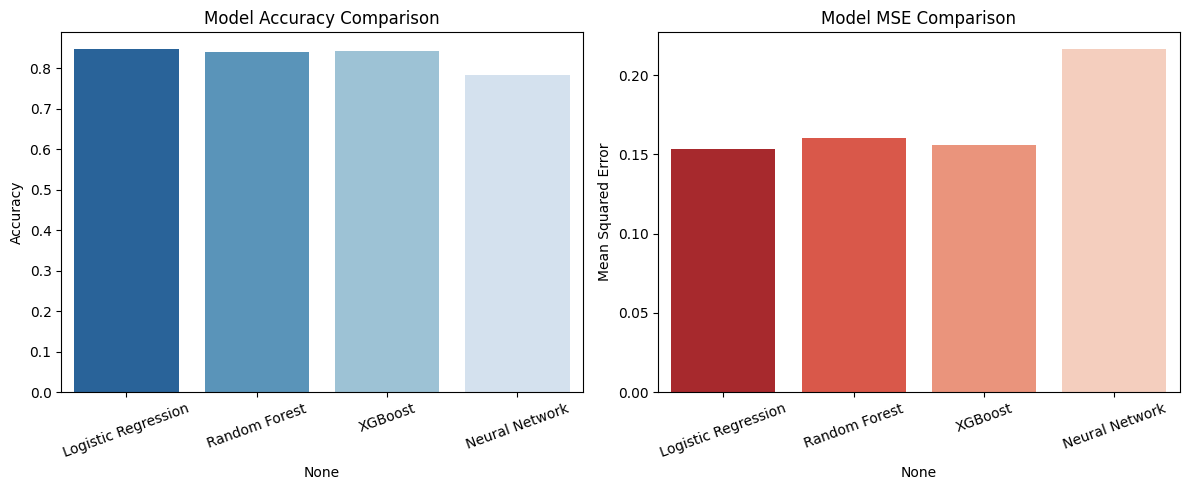

<ipython-input-11-94096f1be303>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=feature_importances, palette="viridis")


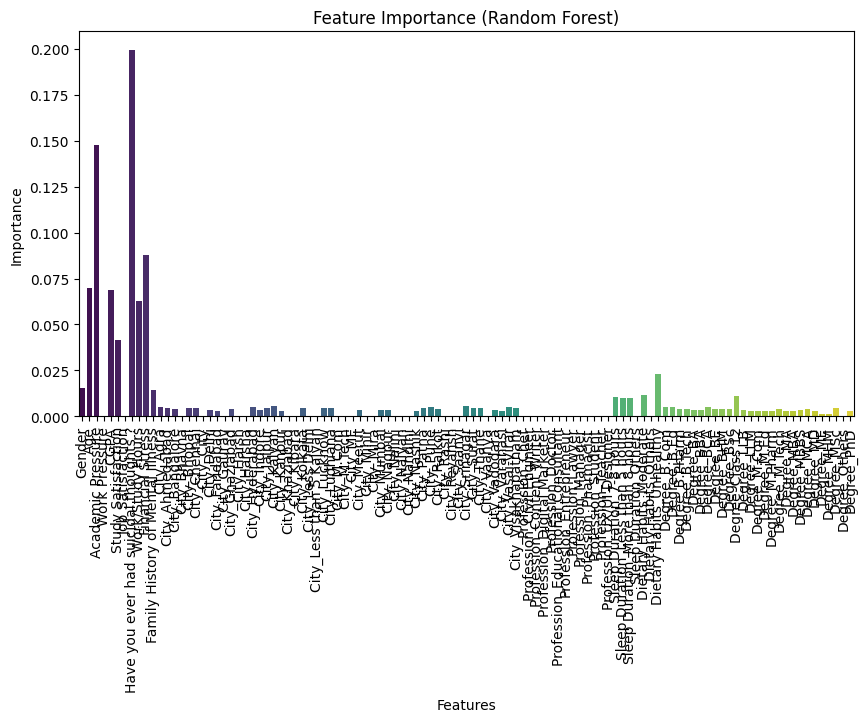


🔹 Top 10 Important Features:
 ['Have you ever had suicidal thoughts ?', 'Academic Pressure', 'Financial Stress', 'Age', 'CGPA', 'Work/Study Hours', 'Study Satisfaction', 'Dietary Habits_Unhealthy', 'Gender', 'Family History of Mental Illness']
                              Feature  Importance
Have you ever had suicidal thoughts ?    0.199510
                    Academic Pressure    0.147769
                     Financial Stress    0.087999
                                  Age    0.069943
                                 CGPA    0.068787
                     Work/Study Hours    0.062499
                   Study Satisfaction    0.041540
             Dietary Habits_Unhealthy    0.022964
                               Gender    0.015432
     Family History of Mental Illness    0.014106


<ipython-input-11-94096f1be303>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feature_importance_df['Feature'][:10], x=feature_importance_df['Importance'][:10], palette="coolwarm")


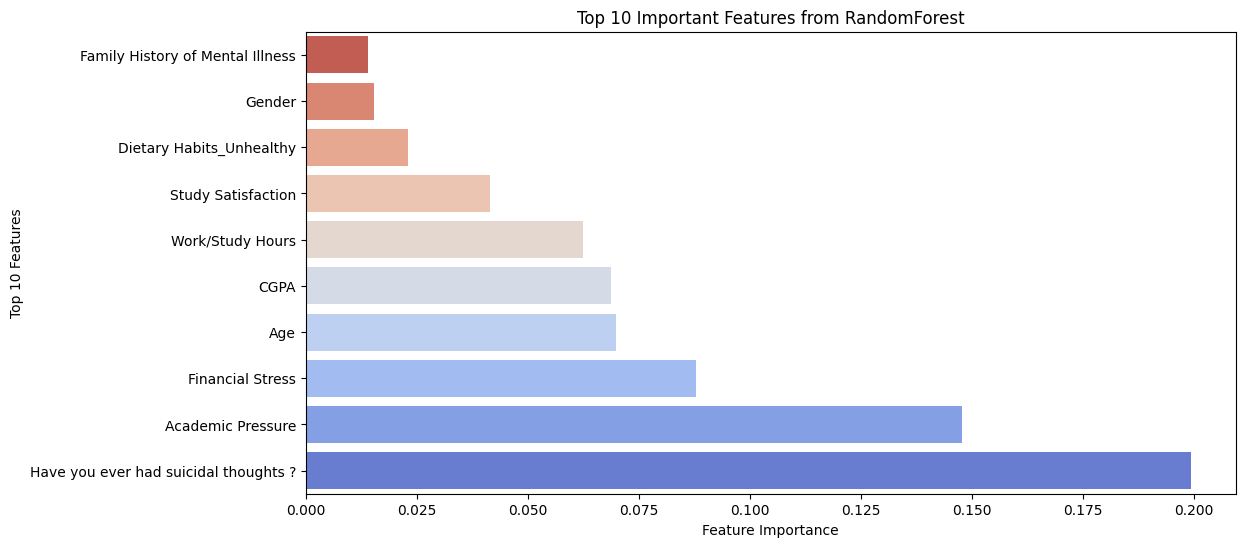


🔹 Training Logistic Regression with Top 10 Features...

🔹 Training Random Forest with Top 10 Features...

🔹 Training XGBoost with Top 10 Features...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:18:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 Training Neural Network with Top 10 Features...

✅ The best model using Top 10 Features is: Logistic Regression
   MSE: 0.1566, ROC AUC: 0.8339


<ipython-input-11-94096f1be303>:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_results_df.index, y=selected_results_df["MSE"], palette="Reds_r")
<ipython-input-11-94096f1be303>:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_results_df.index, y=selected_results_df["ROC AUC"], palette="Blues_r")


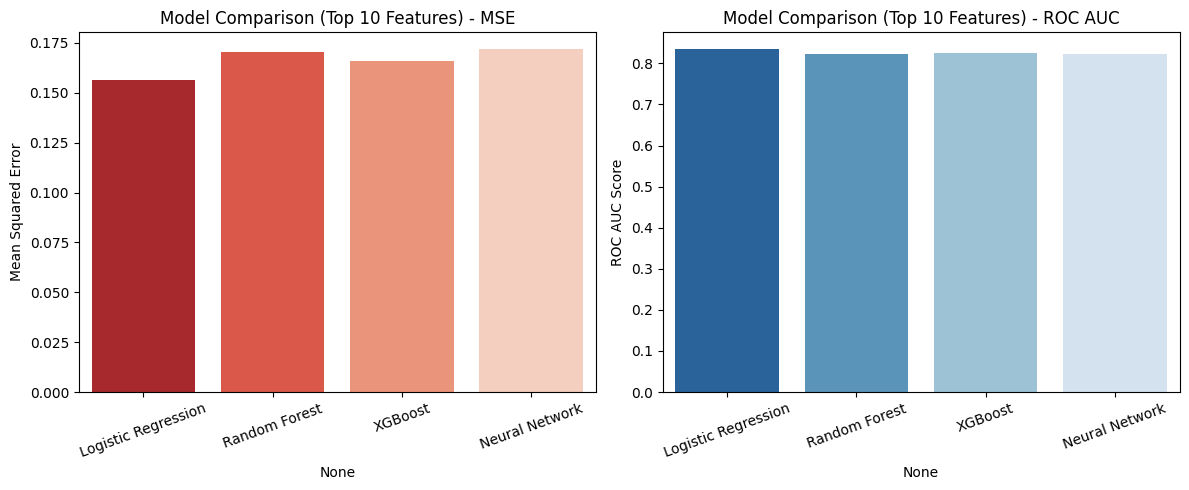

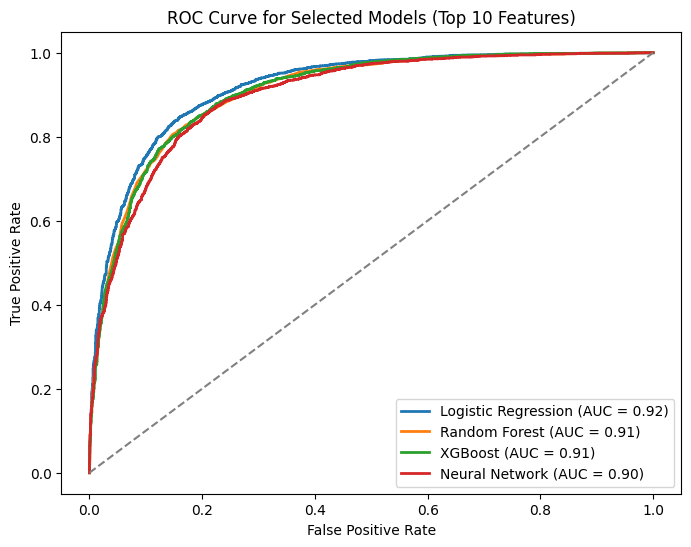

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

# 1. Load the dataset
df = pd.read_csv("/content/Student Depression Dataset.csv")
df.columns = df.columns.str.strip()  # Clean column names by removing whitespace
df.drop(columns=['id'], inplace=True)  # Drop the ID column
df.dropna(inplace=True)  # Remove rows with missing values

# 2. Encode categorical variables
categorical_cols = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

label_encoder = LabelEncoder()
binary_cols = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

df = pd.get_dummies(df, columns=['City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree'], drop_first=True)

# 3. Normalize numerical features
num_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
            'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 4. Split the data into training and testing sets
X = df.drop(columns=['Depression'])
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train multiple models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    results[name] = {"Accuracy": accuracy, "MSE": mse, "ROC AUC": auc_roc}
    print(f"Accuracy: {accuracy:.4f}, MSE: {mse:.4f}, ROC AUC: {auc_roc:.4f}")

# 6. Visualize model results
results_df = pd.DataFrame(results).T

plt.figure(figsize=(12, 5))

# Accuracy visualization
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="Blues_r")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)

# MSE visualization
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y=results_df["MSE"], palette="Reds_r")
plt.title("Model MSE Comparison")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

# 7. Visualize feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=feature_importances, palette="viridis")
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# 8. Extract top 10 most important features from Random Forest
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features = feature_importance_df.head(10)['Feature'].tolist()
print("\n🔹 Top 10 Important Features:\n", top_10_features)

#
top_10_df = feature_importance_df.head(10)
print(top_10_df.to_string(index=False))

# Visualize top 10 features
plt.figure(figsize=(12, 6))
sns.barplot(y=feature_importance_df['Feature'][:10], x=feature_importance_df['Importance'][:10], palette="coolwarm")

plt.xlabel("Feature Importance")
plt.ylabel("Top 10 Features")
plt.title("Top 10 Important Features from RandomForest")
plt.gca().invert_yaxis()
plt.show()

# 9. Train with only the top 10 features
X_train_selected = X_train[top_10_features]
X_test_selected = X_test[top_10_features]

# 10. Retrain models using only the top 10 features
selected_models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

selected_results = {}
y_probs = {}

for name, model in selected_models.items():
    print(f"\n🔹 Training {name} with Top 10 Features...")
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    selected_results[name] = {"MSE": mse, "ROC AUC": auc_roc}

    # Store predicted probabilities for ROC curve
    if hasattr(model, "predict_proba"):
        y_probs[name] = model.predict_proba(X_test_selected)[:, 1]

# 11. Identify the best model
best_model_name = min(selected_results, key=lambda x: selected_results[x]["MSE"])
best_mse = selected_results[best_model_name]["MSE"]
best_auc = selected_results[best_model_name]["ROC AUC"]

print(f"\n✅ The best model using Top 10 Features is: {best_model_name}")
print(f"   MSE: {best_mse:.4f}, ROC AUC: {best_auc:.4f}")

# 12. Visualize MSE comparison
selected_results_df = pd.DataFrame(selected_results).T

plt.figure(figsize=(12, 5))

# MSE Visualization
plt.subplot(1, 2, 1)
sns.barplot(x=selected_results_df.index, y=selected_results_df["MSE"], palette="Reds_r")
plt.title("Model Comparison (Top 10 Features) - MSE")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=20)

# ROC AUC Visualization
plt.subplot(1, 2, 2)
sns.barplot(x=selected_results_df.index, y=selected_results_df["ROC AUC"], palette="Blues_r")
plt.title("Model Comparison (Top 10 Features) - ROC AUC")
plt.ylabel("ROC AUC Score")
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

# 13. Plot ROC Curves
plt.figure(figsize=(8, 6))
for name, y_prob in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Selected Models (Top 10 Features)")
plt.legend(loc="lower right")
plt.show()